<h3>Introduction</h3>

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

In [2]:
# Read in the BOM dataset
BOM_data = pd.read_csv("Assignment 1 DATASET 1 – D1(2).csv")

C:\Users\melan\AppData\Local\Temp\ipykernel_32756\666880135.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  BOM_data = pd.read_csv("Assignment 1 DATASET 1 – D1(2).csv")


<h3>Task 1. Examine and correct data types </h4>

<h4>Examine the data types assigned by the 'pandas' library for each variable in Table 1. Check/assess them with the dataset description provided in Table 1. If there seems to be a mismatch in the data type assigned by the library and the data type as per the description for a variable, correct that data type. Details about the data types that required correction should be included. Finally, attach a screenshot showing the corrected data types of all variables.</h4>

First check the datatype that has been assigned to each variable

In [3]:
# View summary information about the dataframe. This also shows the data type for each variable.
print(BOM_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145490 entries, 0 to 145489
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145490 non-null  object 
 1   Day            145490 non-null  int64  
 2   Month          145490 non-null  int64  
 3   Location       145490 non-null  object 
 4   MinTemp        144005 non-null  float64
 5   MaxTemp        144229 non-null  float64
 6   Rainfall       142228 non-null  float64
 7   Evaporation    82670 non-null   float64
 8   Sunshine       75625 non-null   float64
 9   WindGustDir    135163 non-null  object 
 10  WindGustSpeed  135226 non-null  float64
 11  WindDir9am     134922 non-null  object 
 12  WindDir3pm     141262 non-null  object 
 13  WindSpeed9am   143722 non-null  float64
 14  WindSpeed3pm   142428 non-null  float64
 15  Humidity9am    142836 non-null  float64
 16  Humidity3pm    140983 non-null  float64
 17  Pressure9am    130425 non-nul

In [4]:
# ALso view the dataframe to get a snapshot of the type of data
BOM_data

,Date,Day,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainLastWeek,RainToday,RainTomorrow,ENSO
0,11/01/2008,1,11,Archerfield,13.8,23.0,0.7,NaN,NaN,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,Yes,No,No,NaN
1,11/02/2008,2,11,Archerfield,7.4,25.1,0.0,NaN,NaN,WNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,No,NaN
2,11/03/2008,3,11,Archerfield,12.9,25.7,0.0,NaN,NaN,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,No,NaN
3,11/04/2008,4,11,Archerfield,9.2,28.0,0.0,NaN,NaN,NE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,Yes,No,No,NaN
4,11/05/2008,5,11,Archerfield,17.5,32.3,1.0,NaN,NaN,W,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145485,6/21/2017,21,6,Uluru,2.8,23.4,0.0,NaN,NaN,E,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,No,NaN
145486,6/22/2017,22,6,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,No,NaN
145487,6/23/2017,23,6,Uluru,5.4,26.9,0.0,NaN,NaN,N,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,No,NaN
145488,6/24/2017,24,6,Uluru,7.8,27.0,0.0,NaN,NaN,SE,...,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,No,NaN


There are 4 variables that should be Yes/No: RainLastWeek; RainToday; RainTomorrow and ENSO.\
Will convert these to boolean. 

In [5]:
# First check the unique values for each of these variables

print(BOM_data['RainLastWeek'].value_counts(),
      BOM_data['RainToday'].value_counts(),
      BOM_data['RainTomorrow'].value_counts(),
      BOM_data['ENSO'].value_counts())

RainLastWeek
No     110323
Yes     31905
Name: count, dtype: int64 RainToday
No     110341
Yes     31887
Name: count, dtype: int64 RainTomorrow
No     110338
Yes     31884
Name: count, dtype: int64 ENSO
Yes    10680
yes     2485
No       383
.        116
Name: count, dtype: int64


RainLastWeek, RainToday and RainTomorrow variables all only have 2 values: Yes and No. So we will convert Yes to 1 and No to 0.
However it appears that the ENSO variable has values other than Yes and No. This is inconsistent data and needs to be corrected prior to data mining. 
We will assume that 'Yes' means the same as 'yes' and will assign both a value of 1. 
We will assume that '.' means missing data, so we will convert these values to a null value.

In [9]:
# For RainLastWeek, RainToday and RainTomorrow variables, convert 'Yes' and 'yes' to 1, convert 'No' to 0, and convert '.' to null
bool_conversion = {'No':False, 'Yes':True, 'yes':True, '.':np.nan} # np.nan represents a null value
BOM_data['RainLastWeek'] = BOM_data['RainLastWeek'].map(bool_conversion)
BOM_data['RainToday'] = BOM_data['RainToday'].map(bool_conversion)
BOM_data['RainTomorrow'] = BOM_data['RainTomorrow'].map(bool_conversion)
BOM_data['ENSO'] = BOM_data['ENSO'].map(bool_conversion)
BOM_data

,Date,Day,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainLastWeek,RainToday,RainTomorrow,ENSO
0,11/01/2008,1,11,Archerfield,13.8,23.0,0.7,NaN,NaN,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,NaN,NaN,NaN,NaN
1,11/02/2008,2,11,Archerfield,7.4,25.1,0.0,NaN,NaN,WNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,NaN,NaN,NaN,NaN
2,11/03/2008,3,11,Archerfield,12.9,25.7,0.0,NaN,NaN,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,NaN,NaN,NaN,NaN
3,11/04/2008,4,11,Archerfield,9.2,28.0,0.0,NaN,NaN,NE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,NaN,NaN,NaN,NaN
4,11/05/2008,5,11,Archerfield,17.5,32.3,1.0,NaN,NaN,W,...,1010.8,1006.0,7.0,8.0,17.8,29.7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145485,6/21/2017,21,6,Uluru,2.8,23.4,0.0,NaN,NaN,E,...,1024.6,1020.3,NaN,NaN,10.1,22.4,NaN,NaN,NaN,NaN
145486,6/22/2017,22,6,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,...,1023.5,1019.1,NaN,NaN,10.9,24.5,NaN,NaN,NaN,NaN
145487,6/23/2017,23,6,Uluru,5.4,26.9,0.0,NaN,NaN,N,...,1021.0,1016.8,NaN,NaN,12.5,26.1,NaN,NaN,NaN,NaN
145488,6/24/2017,24,6,Uluru,7.8,27.0,0.0,NaN,NaN,SE,...,1019.4,1016.5,3.0,2.0,15.1,26.0,NaN,NaN,NaN,NaN


In [6]:
# For RainLastWeek, RainToday and RainTomorrow variables, convert 'Yes' and 'yes' to 1, convert 'No' to 0, and convert '.' to null

binary_conversion = {'No':0, 'Yes':1, 'yes':1, '.':np.nan} # np.nan represents a null value
BOM_data['RainLastWeek'] = BOM_data['RainLastWeek'].map(binary_conversion)
BOM_data['RainToday'] = BOM_data['RainToday'].map(binary_conversion)
BOM_data['RainTomorrow'] = BOM_data['RainTomorrow'].map(binary_conversion)
BOM_data['ENSO'] = BOM_data['ENSO'].map(binary_conversion)

Next, we will re-check the values in each variable to confirm that they have been converted correctly

In [7]:
# Use value_counts to again list and count the values in the 4 variables
print(BOM_data['RainLastWeek'].value_counts(),
      BOM_data['RainToday'].value_counts(),
      BOM_data['RainTomorrow'].value_counts(),
      BOM_data['ENSO'].value_counts())

RainLastWeek
0.0    110323
1.0     31905
Name: count, dtype: int64 RainToday
0.0    110341
1.0     31887
Name: count, dtype: int64 RainTomorrow
0.0    110338
1.0     31884
Name: count, dtype: int64 ENSO
1.0    13165
0.0      383
Name: count, dtype: int64


The binary conversion appears to have worked and the counts of each value are expected E.g. for the ENSO variable, there are now 13165 counts of value 1, which is the sum of the previous Yes (10680) and yes (2485) values\
Next we will check the data types again to see if the data type has changed following the conversion.

In [8]:
# Check the data types again
BOM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145490 entries, 0 to 145489
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145490 non-null  object 
 1   Day            145490 non-null  int64  
 2   Month          145490 non-null  int64  
 3   Location       145490 non-null  object 
 4   MinTemp        144005 non-null  float64
 5   MaxTemp        144229 non-null  float64
 6   Rainfall       142228 non-null  float64
 7   Evaporation    82670 non-null   float64
 8   Sunshine       75625 non-null   float64
 9   WindGustDir    135163 non-null  object 
 10  WindGustSpeed  135226 non-null  float64
 11  WindDir9am     134922 non-null  object 
 12  WindDir3pm     141262 non-null  object 
 13  WindSpeed9am   143722 non-null  float64
 14  WindSpeed3pm   142428 non-null  float64
 15  Humidity9am    142836 non-null  float64
 16  Humidity3pm    140983 non-null  float64
 17  Pressure9am    130425 non-nul

The RainLastWeek, RainToday, RainTomorrow and ENSO variables are now 'float64' data types. With values of 1 and 0, I was expecting an 'int64' data type, but after some reading, it appears that the pandas library assigns these variables as 'float64' data type as they contain missing data, represented as NaN. And because NaN is a float, this forces an array of integers with any missing values to be represented as 'float64'.

Another variable within this dataframe that could have the data type converted is the Date variable. This variable was assigned the data tpe 'object', but converting to a datetime data type would allow specific datetime operations.

In [9]:
# Convert the Date variable to datetime data type

BOM_data['Date'] = BOM_data['Date'].astype('datetime64[ns]')

In [10]:
# Check if the data type conversion has worked

BOM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145490 entries, 0 to 145489
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145490 non-null  datetime64[ns]
 1   Day            145490 non-null  int64         
 2   Month          145490 non-null  int64         
 3   Location       145490 non-null  object        
 4   MinTemp        144005 non-null  float64       
 5   MaxTemp        144229 non-null  float64       
 6   Rainfall       142228 non-null  float64       
 7   Evaporation    82670 non-null   float64       
 8   Sunshine       75625 non-null   float64       
 9   WindGustDir    135163 non-null  object        
 10  WindGustSpeed  135226 non-null  float64       
 11  WindDir9am     134922 non-null  object        
 12  WindDir3pm     141262 non-null  object        
 13  WindSpeed9am   143722 non-null  float64       
 14  WindSpeed3pm   142428 non-null  float64       
 15  

The Date variable has now been assigned the datetime data type. This allows datetime operations to be performed on this variable. For instance, I will add a new column to show just the Year.

In [11]:
# Create a new column called 'Year' and populate it with the year from the 'Date column'

BOM_data['Year'] = BOM_data['Date'].dt.year

# And check that it has worked by viewing the values and counts for the new Year column

BOM_data['Year'].value_counts()

Year
2016    17934
2014    17885
2015    17885
2009    16789
2010    16782
2013    16415
2012    15409
2011    15407
2017     8623
2008     2300
2007       61
Name: count, dtype: int64

<h3>Task 2. Use suitable statistical measures and functions </h3>


<h4>i. Identify and report the variables with skewness. Show the detail.</h4>

Skewness is a measure of the asymmetry of a distribution. A skewed distribution can be identified a number of ways. Firstly, by looking at the summary statistics: mean, median and mode. A positive skew is when the mean > median > mode. Conversely, a negative skew is when mode > median > mean.

When viewing summary statistics, we will just work with numeric variables.

In [35]:
# First create a dataframe to look at only the numeric columns
BOM_data_numeric = BOM_data.select_dtypes(include=[np.number])

# Now look at the mean
BOM_mean = round(BOM_data_numeric.mean(),1) # Round the mean to 1 decimal place

# And the median
BOM_median = BOM_data_numeric.median()

# And the mode
BOM_mode = BOM_data_numeric.mode()

# Combine into a table for easy comparison
BOM_summary_stats = pd.DataFrame({'Mean' : BOM_mean, 'Median' : BOM_median, 'Mode' : BOM_mode.T.loc[:,0]}) # Transform the mode array and keep only the first column
BOM_summary_stats

,Mean,Median,Mode
Day,15.7,16.0,1.0
Month,6.4,6.0,3.0
MinTemp,12.2,12.0,11.0
MaxTemp,23.2,22.6,20.0
Rainfall,2.4,0.0,0.0
Evaporation,5.5,4.8,4.0
Sunshine,7.6,8.4,0.0
WindGustSpeed,40.0,39.0,35.0
WindSpeed9am,14.0,13.0,9.0
WindSpeed3pm,18.7,19.0,13.0


In the above table we can compare the mean, median and mode which indicates skewness of the variables. We will ignore Day, Month and Year. The table indicates that:
- MinTemp is positively skewed
- MaxTemp is positively skewed
- Rainfall is positively skewed
- Evaopration is positively skewed
- WindGustSPeed is positively skewed
- WindSpeen9am is positively skewed
- Humidity9am is negatively skewed
- Cloud9am is negatively skewed
- Cloud3pm is negatively skewed

Skewness can also be assessed using the pandas `skew()` command

In [13]:
BOM_data_numeric.skew()

Day              0.009039
Month            0.029997
MinTemp          0.021099
MaxTemp          0.220613
Rainfall         9.836507
Evaporation      3.761286
Sunshine        -0.496480
WindGustSpeed    0.874800
WindSpeed9am     0.777588
WindSpeed3pm     0.628096
Humidity9am     -0.483664
Humidity3pm      0.033811
Pressure9am     -0.095447
Pressure3pm     -0.045516
Cloud9am        -0.229161
Cloud3pm        -0.226289
Temp9am          0.088407
Temp3pm          0.237751
RainLastWeek     1.321776
RainToday        1.322648
RainTomorrow     1.322729
ENSO            -5.692946
Year            -0.049514
dtype: float64

<h4>ii. There may be inconsistencies or errors in the data. List the errors identified and detail how you have identified them.</h4>

To look for inconsistencies in the data, exploratory functions such as `.describe()`, `.unique()` and `.value_counts()` were run across each variable. Visualisation was also performed in some cases. Inconsistencies and errors that were revealed include:
1. Inconsistent data for the ENSO variable. This was identified earlier as part of the first task. It was identified using `value_counts`(screenshot below)

![Alt](Capture.PNG "Title")

2. Missing data
From `BOM_data.info()` it was clear that some variables have a lot less data than others. These include:
- Evaporation
- Sunshine
- Cloud9am
- Cloud3pm
- ENSO

To investigate the source of the missing data, the dataframe was grouped by each variable to look for patterns. It showed that some locations had mssing data for these variables:
- Evaporation - no data from 16 locations: Archerfield, Badgerys Creek, Ballarat, Gold Coast, Mount Ginini, Newcastle, Nhil, Norah Head, Pearce RAAF, Penrith, Salmon Gums, Tuggeranong, Uluru, Walpole, Witchcliffe, Wollongong
- Sunshine - no data from 19 locations: Archerfield, Badgerys Creek, Ballarat, Bendigo, Gold Coast, Katherine, Launceston, Mount Ginini, Newcastle, Nhil, Norah Head, Penrith, Richmond, Salmon Gums, Tuggeranong, Uluru, Walpole, Witchcliffe, Wollongong
- Cloud9am and CLoud3pm - no data from Adelaide, Badgerys Creek, Dartmoor, Gold Coast, Mount Ginini, Nhil, Norah Head, Penrith, Salmon Gums, Tuggeranong, Walpole, Witchcliffe

Also, ENSO is only recorded for 5 locations.

The exploration also revealed that there were 3 locations (Katherine, Nhil and Uluru) which only have ~ 1500 instances compared to the other locations which have ~3000 each. These 3 locations only have data from 2013 onwards, whereas most others have data from 2009. A small group of locations (all state or territory capitals: Sydney, Canberra, Melbourne, Brisbane, Adelaide, Perth, Hobart, Darwin) have more instances than others with data from 2008.

This was discovered by visualising the count of instances for Location. Then to confirm that data from paritcular years were missing, count of the data was grouped by location then by year.

In [119]:
BOM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145490 entries, 0 to 145489
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145490 non-null  datetime64[ns]
 1   Day            145490 non-null  int64         
 2   Month          145490 non-null  int64         
 3   Location       145490 non-null  object        
 4   MinTemp        144005 non-null  float64       
 5   MaxTemp        144229 non-null  float64       
 6   Rainfall       142228 non-null  float64       
 7   Evaporation    82670 non-null   float64       
 8   Sunshine       75625 non-null   float64       
 9   WindGustDir    135163 non-null  object        
 10  WindGustSpeed  135226 non-null  float64       
 11  WindDir9am     134922 non-null  object        
 12  WindDir3pm     141262 non-null  object        
 13  WindSpeed9am   143722 non-null  float64       
 14  WindSpeed3pm   142428 non-null  float64       
 15  

In [131]:
# Group the data by location and count the instances for each variable
BOM_data.groupby('Location').count()

,Date,Day,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainLastWeek,RainToday,RainTomorrow,ENSO,Year
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adelaide,3193,3193,3193,3191,3190,3091,1704,1769,3167,3167,2919,3177,3188,3188,3188,3188,3185,3186,0,0,3188,3189,3091,3091,3090,0,3193
Albany,3040,3040,3040,2977,2986,3016,2750,2520,0,0,2793,2257,2979,2307,2991,2324,3015,3015,3002,2329,3001,2328,3016,3016,3016,0,3040
AliceSprings,3040,3040,3040,3039,3038,3032,2825,2520,2989,2989,2810,3036,3038,3038,3037,3035,3039,3037,2706,2679,3040,3038,3032,3032,3031,0,3040
Archerfield,3070,3070,3070,3059,3059,3040,0,0,3037,3037,2543,3024,3060,3059,3061,3062,3065,3062,1299,1439,3061,3062,3040,3040,3040,2978,3070
BadgerysCreek,3009,3009,3009,2973,2980,2928,0,0,2933,2933,2574,2924,2960,2961,2955,2954,2841,2836,0,0,2968,2965,2928,2928,2928,3009,3009
Ballarat,3040,3040,3040,3039,3039,3028,0,0,3009,3009,2949,3022,3032,3036,3019,3033,3016,3014,2494,1992,3028,3034,3028,3028,3028,0,3040
Bendigo,3040,3040,3040,3038,3035,3034,1185,0,2999,3000,2796,2997,3036,3036,3033,3038,3025,3030,2072,2268,3037,3038,3034,3034,3034,0,3040
Brisbane,3193,3193,3193,3184,3179,3161,3174,3144,3152,3152,3123,3159,3192,3185,3189,3178,3192,3185,3192,3191,3189,3178,3161,3161,3161,0,3193
Cairns,3040,3040,3040,3039,3040,2988,2670,2564,3021,3022,2997,3036,3039,3039,3039,3040,3039,3040,2833,2810,3039,3040,2988,2988,2988,0,3040


In [134]:
# Display count of instances grouped by location, then year
pd.set_option('display.max_rows', None)
BOM_data.groupby(['Location', 'Year']).count()

Date  Day  Month  MinTemp  MaxTemp  Rainfall  \
Location         Year                                                 
Adelaide         2008   184  184    184      183      183       166   
                 2009   365  365    365      365      365       362   
                 2010   365  365    365      365      365       359   
                 2011   335  335    335      335      335       326   
                 2012   335  335    335      335      335       320   
                 2013   337  337    337      337      337       308   
                 2014   365  365    365      365      365       350   
                 2015   365  365    365      364      364       360   
                 2016   366  366    366      366      366       366   
                 2017   176  176    176      176      175       174   
Albany           2008    31   31     31       30       31        31   
                 2009   365  365    365      361      365       365   
                 2010   365  365    365      365      365       365   
                 2011   335  335    335      335      335       335   
                 2012   335  335    335      331      333       335   
                 2013   337  337    337      335      335       334   
                 2014   365  365    365      358      360       360   
                 2015   365  365    365      359      358       364   
                 2016   366  366    366      357      342       362   
                 2017   176  176    176      146      162       165   
AliceSprings     2008    31   31     31       31       31        31   
                 2009   365  365    365      365      365       365   
                 2010   365  365    365      365      365       365   
                 2011   335  335    335      335      335       335   
                 2012   335  335    335      335      335       335   
                 2013   337  337    337      337      337       337   
                 2014   365  365    365      364      365       365   
                 2015   365  365    365      365      364       365   
                 2016   366  366    366      366      366       363   
                 2017   176  176    176      176      175       171   
Archerfield      2008    61   61     61       61       61        59   
                 2009   365  365    365      364      364       364   
                 2010   365  365    365      361      361       358   
                 2011   335  335    335      332      332       330   
                 2012   335  335    335      335      335       334   
                 2013   337  337    337      336      336       333   
                 2014   365  365    365      363      363       360   
                 2015   365  365    365      365      365       365   
                 2016   366  366    366      366      366       366   
                 2017   176  176    176      176      176       171   
BadgerysCreek    2009   365  365    365      359      365       359   
                 2010   365  365    365      360      361       333   
                 2011   335  335    335      335      335       332   
                 2012   335  335    335      335      335       332   
                 2013   337  337    337      337      336       334   
                 2014   365  365    365      362      362       356   
                 2015   365  365    365      361      362       358   
                 2016   366  366    366      348      348       349   
                 2017   176  176    176      176      176       175   
Ballarat         2008    31   31     31       31       31        31   
                 2009   365  365    365      365      365       365   
                 2010   365  365    365      365      365       364   
                 2011   335  335    335      334      335       329   
                 2012   335  335    335      335      335       335   
                 2013   337  337    337      33

3. Outlier in evaopration. The evaporation variable has an outlier value of 145. It may be real (theoretically possible - evaporation is measured by 'Class A' pan evaporation in the 24 hours to 9am), or could be an error. It was discovered by running `value_counts()` on the Evaopration variable.

In [16]:
# View the number of counts of each value for Evaporation variable
BOM_data['Evaporation'].value_counts().sort_index()

Evaporation
0.0      244
0.1        8
0.2      503
0.3       10
0.4      769
        ... 
77.3       1
81.2       1
82.4       1
86.2       1
145.0      1
Name: count, Length: 358, dtype: int64

In [17]:
# Just view the row when evaopration was recorded at 145 to see if there are any clues as to whether it is real data or an error
BOM_data[BOM_data['Evaporation']==145]

,Date,Day,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainLastWeek,RainToday,RainTomorrow,ENSO,Year
42388,2016-12-19,19,12,Williamtown,15.3,23.9,58.2,145.0,NaN,NaN,...,1017.0,8.0,1.0,19.1,23.0,1.0,1.0,0.0,NaN,2016


4. The Evaporation and Rainfall variables are mostly recorded in increments of 0.2. But some recordings are 0.1, 0.3 etc. This was discovered by running `value_counts()` on the Evaporation and Rainfall variables

In [18]:
# View the number of counts of each value for Rainfall variable
BOM_data['Rainfall'].value_counts().sort_index()

Rainfall
0.0      91099
0.1        157
0.2       8762
0.3         65
0.4       3782
         ...  
247.2        1
268.6        1
278.4        1
367.6        1
371.0        1
Name: count, Length: 681, dtype: int64

5. Humidity9am variable has an unexpected spike at values 98, 99 and 100. This was found through the `value_counts()` function on the Humidity9am variable and a distribution plot

In [19]:
# View the number of counts of each value for Humidity 9am variable
BOM_data['Humidity9am'].value_counts().sort_index()

Humidity9am
0.0         1
1.0         5
2.0         8
3.0        10
4.0        20
         ... 
96.0     1609
97.0     1789
98.0     2099
99.0     3391
100.0    2863
Name: count, Length: 101, dtype: int64

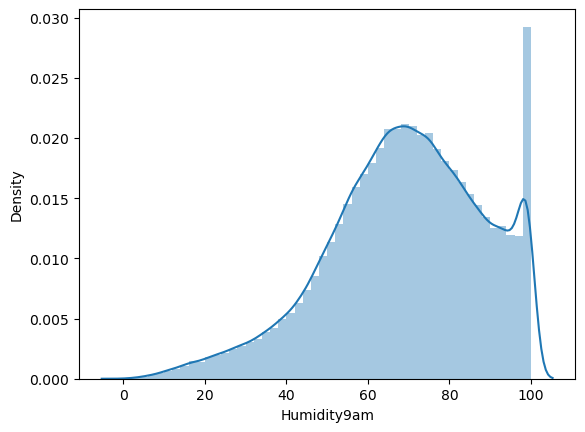

In [20]:
# Check distribution of the Humidty9am variable

warnings.filterwarnings("ignore")

distributions = sns.distplot(BOM_data['Humidity9am'])
plt.show()

<h4>iii Summarise your findings (e.g., noise and data quality problem in the data, patterns that you may have observed, etc) during this data exploration process</h4>

In summary, the data exploration process revealed:
- Missing data - particulalry for 3 locations which only have data recorded from 2013 onwards, comparded to 2008 or 2009 for other locations.
- Inconsistent data - the ENSO variable had values of 'Yes' and 'yes' which presumably mean the same thing but were entered differently. Also inconsistent measurement of Rainfall and evaporation: most instances are measured in increments of 0.2, but some are measured in 0.1 increments. The data has been collected inconsistently.
- Noisy data - Evaporation has an outlier value of 145, but it is difficult to tell whether this is a data entry error or a true outlier. Humidity9am also had an unexpected peak of values 98, 99 and 100

<h4>iv Respond to the following questions:</h4>


<h5>a. Give the details (location and month) of the longest day (the day which had the most sunshine) recorded in this dataset.</h5>

In [21]:
# To find the location and month of the longest day, filter the data to only show the row with the maximum sunshine
BOM_data[(BOM_data["Sunshine"]) == BOM_data["Sunshine"].max()]

,Date,Day,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainLastWeek,RainToday,RainTomorrow,ENSO,Year
72886,2015-12-28,28,12,Mildura,12.8,30.5,0.0,12.0,14.5,SE,...,1020.8,0.0,0.0,17.9,28.7,0.0,0.0,0.0,NaN,2015


**Mildura** had the longest day with 14.5 hours of sunshine that day, which occurred in **month 12** (28 December 2015).

<h5>b. What was the average maximum temperature recorded in 2016 in Uluru when the sudden burst in wind speed was in the Southerly direction?</h5>

In [22]:
# Create a dataframe filtered for Uluru, 2016 and WindGustDir is south

Uluru_2016_S = BOM_data[(BOM_data['Year'] == 2016) & (BOM_data['Location'] == 'Uluru') & (BOM_data['WindGustDir'] == 'S')]

# Now look at mean maximum temperature within this dataframe
Uluru_2016_S['MaxTemp'].mean()

32.1764705882353

The average maximum temperature recorded in 2016 at Uluru when the wind gust direction was southerly was **32.18**

<h5>c. List the top-5 locations based on the total amount of rainfall recorded in 2017.</h5>

In [23]:
# Filter the dataframe to only show the year 2017. Then group the data by location and display the total (sum) rainfall.
# Show only the 5 largest values
BOM_data[(BOM_data['Year'] == 2017)].groupby(['Location'])['Rainfall'].sum().nlargest(5)

Location
Darwin          1739.0
CoffsHarbour    1307.8
Cairns          1256.2
Katherine       1133.8
Sydney           865.8
Name: Rainfall, dtype: float64

Top 5 locations based on total rainfall recorded in 2017 are: **Darwin, Coffs Harbour, Cairns, Katherine and Sydney.**

<h5>d. Give a summary of the wind directions such as the frequency of a particular wind direction when it was a rainy day.</h5>

In [28]:
# Group the data by RainToday (1= a rainy day) and view the frequency of vlues for each wind direction at 9am
BOM_data.groupby(['RainToday'])['WindDir9am'].value_counts(normalize=True) # normalise the counts to make it more comparable

RainToday  WindDir9am
0.0        N             0.091171
           E             0.077976
           SE            0.073617
           SSE           0.068212
           NNE           0.067098
           ENE           0.066463
           ESE           0.063677
           NE            0.063355
           NW            0.062133
           S             0.060041
           NNW           0.057187
           W             0.054040
           SW            0.052603
           SSW           0.050003
           WNW           0.049681
           WSW           0.042741
1.0        SW            0.094971
           W             0.092149
           WSW           0.082689
           S             0.078639
           SSW           0.077975
           NW            0.073228
           WNW           0.070241
           N             0.069012
           NNW           0.066423
           SSE           0.066124
           SE            0.054905
           NNE           0.036448
           E             0

In [29]:
# Now repeat for the wind direction at 3pm to compare
BOM_data.groupby(['RainToday'])['WindDir3pm'].value_counts(normalize=True)

RainToday  WindDir3pm
0.0        SE            0.077462
           N             0.068487
           NE            0.065753
           W             0.065204
           S             0.064748
           SSE           0.064469
           E             0.064358
           ESE           0.064060
           NW            0.061149
           SW            0.061075
           WSW           0.061075
           ENE           0.060926
           NNW           0.059019
           WNW           0.058712
           NNE           0.051858
           SSW           0.051644
1.0        W             0.094192
           WSW           0.088982
           S             0.084873
           SW            0.084711
           SSW           0.079437
           WNW           0.076492
           SE            0.075716
           SSE           0.071477
           NW            0.061220
           ESE           0.047953
           E             0.046141
           NNW           0.044459
           N             0

In [30]:
# Now try to plot it
# First make new dataframes, one with only RainToday=0 and the other with RainToday=1
rain_today_df = BOM_data[BOM_data['RainToday']==1]
no_rain_today_df = BOM_data[BOM_data['RainToday']==0]

# Check the dimensions of the new dataframes

print(rain_today_df.shape)
print(no_rain_today_df.shape)

(31887, 28)
(110341, 28)


In [31]:
# Next count the frequecny of each wind direction at 9am
# Return the value as a % (normalize = true)
rain_wind_dir = rain_today_df.value_counts('WindDir9am', normalize = True)
no_rain_wind_dir = no_rain_today_df.value_counts('WindDir9am', normalize = True)

print(rain_wind_dir)
print(no_rain_wind_dir)

WindDir9am
SW     0.094971
W      0.092149
WSW    0.082689
S      0.078639
SSW    0.077975
NW     0.073228
WNW    0.070241
N      0.069012
NNW    0.066423
SSE    0.066124
SE     0.054905
NNE    0.036448
E      0.035851
NE     0.035552
ESE    0.034888
ENE    0.030905
Name: proportion, dtype: float64
WindDir9am
N      0.091171
E      0.077976
SE     0.073617
SSE    0.068212
NNE    0.067098
ENE    0.066463
ESE    0.063677
NE     0.063355
NW     0.062133
S      0.060041
NNW    0.057187
W      0.054040
SW     0.052603
SSW    0.050003
WNW    0.049681
WSW    0.042741
Name: proportion, dtype: float64


(0.0, 0.1)

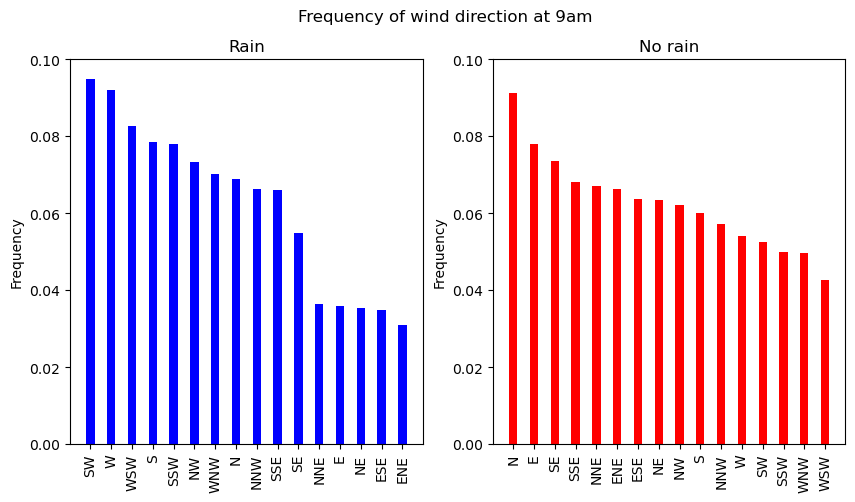

In [32]:
# Convert each to lists ready for visualisation
directions1 = rain_wind_dir.index.tolist() # List of the response categories
directions2 = no_rain_wind_dir.index.tolist() # List of the response categories
rain_list = rain_wind_dir.tolist()
no_rain_list = no_rain_wind_dir.tolist()

# Set figure size
fig = plt.figure(figsize=(10,5))
plt.suptitle('Frequency of wind direction at 9am') # Set a title for full plot
width = 0.4

plt.subplot(1,2,1) # Define 1 row with 2 columns of plots, this is plot 1
plt.bar(directions1, rain_list, width, color = 'blue') # Bar chart of the tech sector responses
plt.title('Rain') # Set a title for sub-plot
plt.xticks(rotation =90) # Rotate labels so they can be seen
plt.ylabel('Frequency')
plt.ylim(0,0.1) # Set the y axis limits to make the subplots comparable

plt.subplot(1,2,2) # Define 1 row with 2 columns of plots, this is plot 2
plt.bar(directions2, no_rain_list, width, color = 'red') # Bar chart of the non-tech sector responses
plt.title('No rain') # Set a title for sub-plot
plt.xticks(rotation = 90) # Rotate labels so they can be seen
plt.ylabel('Frequency')
plt.ylim(0,0.1) # Set the y axis limits to make the subplots comparable

At 9am, wind direction is mostly northerly when there is no rain. But south westerly or westerly when there is rain, and very rarely from the east.

Similarly, at 3pm, wind direction is south easterly when there is no rain. But westerly or west south westerly when there is rain.

<h3>Task 3. Use suitable visualisation plots</h3>

<h4>i. Understand the distribution of variables and identify data quality problems.</h4>

To understand the distribution of variables, visualisation plots such as box plots, histograms and bar charts were used on each variable

A few data quality problems were identified:
- `Rainfall` distribution is highly skewed because there are many instances of 0 rainfall. This may be real (many days have no rainfall, particularly under drought conditions)
- The histogram revealed that the `Sunshine` variable also has a peak of 0 values. To investigate whether this is real data or errors, the distribution of `Cloud9am` was plotted for only the data with 0 hours of sunshine. It showed that all the days with 0 hours of sunshine did have a lot of cloud cover (7 or 8 Oktas out of a possible 8), which suggests the instances of 0 hours of sunshine are real.
- The histogram revealed `Humidity9am` has a peak at 98,99,100 which is inconsistent with the distribution of the data. 
- As shown in Task 2, 3 locations are missing a lot of data, it appears that data was only colleced from 2013 for these locations

All variables were visualised, but only those with data quality problems or interseting features are shown below.

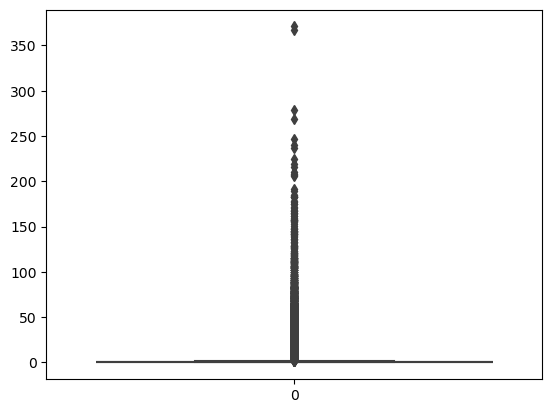

In [63]:
# Check distribution of Rainfall variable using box plot

box_plot = sns.boxplot(BOM_data['Rainfall'])
plt.show()

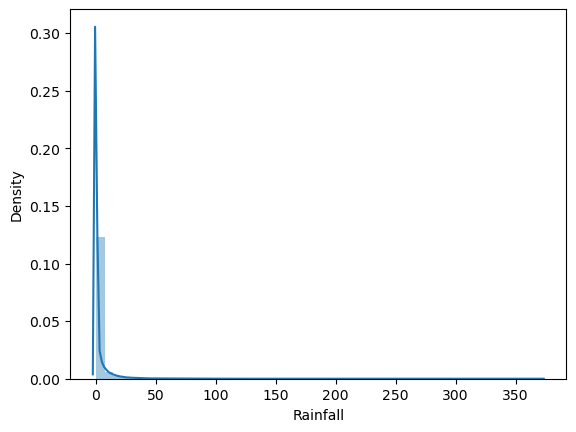

In [64]:
#Check distribution of Rainfall variable using histogram

warnings.filterwarnings("ignore")

distributions = sns.distplot(BOM_data['Rainfall'])
plt.show()

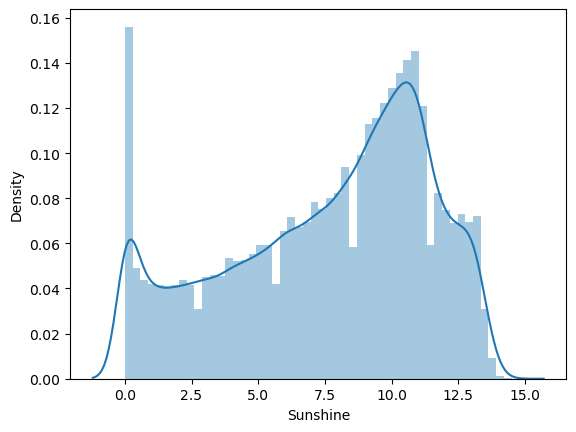

In [67]:
#Check distribution of Sunshine variable using histogram

warnings.filterwarnings("ignore")

distributions = sns.distplot(BOM_data['Sunshine'])
plt.show()

In [83]:
no_sun = BOM_data[(BOM_data['Sunshine'] == 0)]
no_sun.groupby(['Month'])['MaxTemp'].count()

warnings.filterwarnings("ignore")

distributions = sns.distplot(BOM_data['Sunshine'])
plt.show()

Month
1     228
2     224
3     219
4     178
5     227
6     346
7     214
8     140
9     104
10    139
11    150
12    165
Name: MaxTemp, dtype: int64

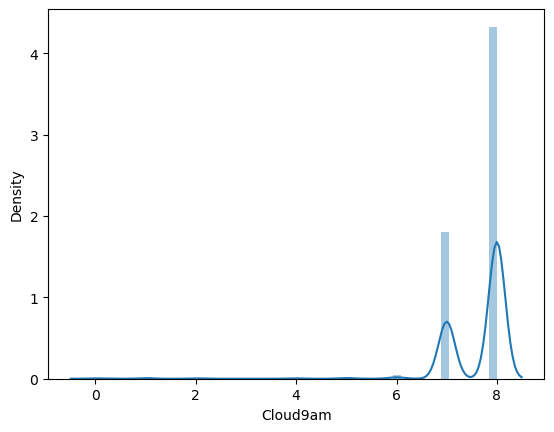

In [94]:
# Check the distribution of Cloud9am for all instances with 0 hours of Sunshine. 
# You would expect days with no sunshine to have a lot of cloud cover.

warnings.filterwarnings("ignore")

distributions = sns.distplot(no_sun['Cloud9am'])
plt.show()

The days with 0 hours of sunshine do indeed have a lot of cloud cover, so we will assume that the data is real.

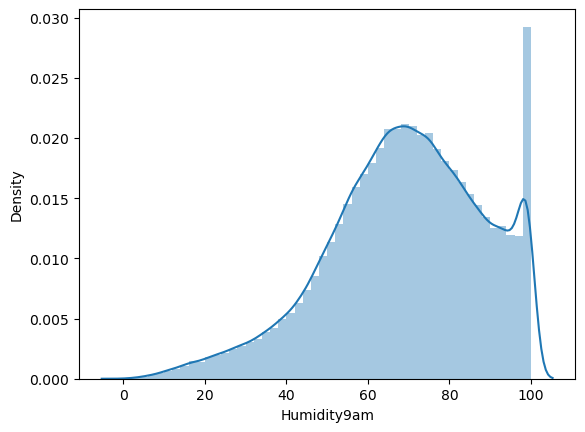

In [68]:
#Check distribution of Humidity9am variable using histogram

warnings.filterwarnings("ignore")

distributions = sns.distplot(BOM_data['Humidity9am'])
plt.show()

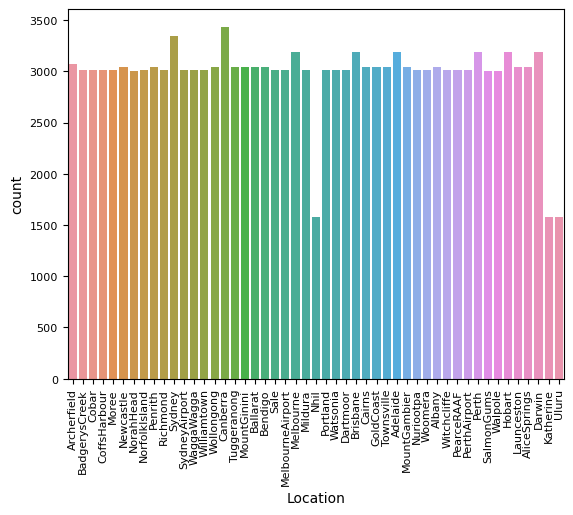

In [14]:
# Visualise the number of instances by Location
barchart = sns.countplot(data=BOM_data, x='Location')
plt.xticks(rotation=90) # Rotate the labels so they are visible
plt.tick_params(labelsize=8) # Reduce the label size so they are visible
plt.show()

<h4>ii. Determine if there is any relationship between the variables Humidity3pm and Pressure3pm? How would you handle these two variables in the data modelling if a relationship exists?</h4>

A scatterplot will be used to look for a relationship between the 2 variables `Humidity3pm` and `Pressure3pm`

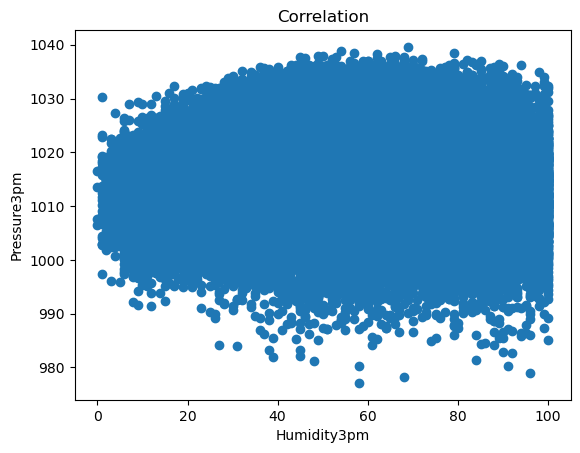

In [90]:
# Create a scatter plot
plt.scatter(BOM_data['Humidity3pm'], BOM_data['Pressure3pm'])
plt.title('Correlation')
plt.xlabel('Humidity3pm')
plt.ylabel('Pressure3pm')
plt.show()


The scatterplot suggests that there is no relationship between the `Pressure3pm` and `Humidity3pm` variables. If there was a relationship, you would consider removing one of the variables from the data modelling, particularly if either `Pressure3pm` or `Humidity3pm` were set as the target variable. If both variables were retained, one could act as a false predictor and lead to inaccurate or misleading results in the data modelling.

<h4>iii. Identify the highly correlated variable pairs and elaborate on how to treat these variables in the mining process in such a case.</h4>

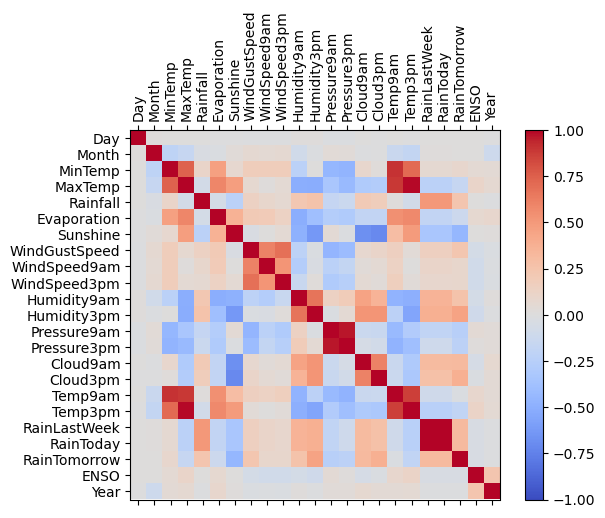

In [88]:
# Plot the correlation matrix for all of the numerical variables. Use the data frame with just numeric values

corr = BOM_data_numeric.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(BOM_data_numeric.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(BOM_data_numeric.columns)
ax.set_yticklabels(BOM_data_numeric.columns)
plt.show()

The correlation matrix identifies the following highly correlated variable pairs:
- `MinTemp` + `MaxTemp`
- `MinTemp` + `Temp9am`
- `MaxTemp` + `Temp3pm`
- `Pressure9am` + `Pressure3pm`
- `Humidity9am` + `Humidity3pm`
- `Cloud9am` + `Cloud3pm`
- `Sunshine` + `Cloud9am`
- `Sunshine` + `Cloud3pm`

When mining this data, you should remove any redundant variables, and this correlation analysis informs which variables could be considered redundant. For example, based on the correlation analysis, you would only include one temperature variable (either MaxTemp, MinTemp, Temp9am or Temp3pm) and then remove the other 3. Similarly, you would only include one pressure variable (Pressure9am or Pressure 3pm) and remove the other. And you should only include one variable related to sunshine/cloud cover (choose either Sunshine, Cloud9am or Cloud3pm) and remove the other 2 variables from the data mining. 

Is there a threshold?

<h4>iv. Summarise your findings (e.g., noise and data quality problem in the data, patterns that you may have observed, etc) during this data exploration process.</h4>

<h3>4. Prepare data</h3>

<h4>i. Elaborate on the data preparation steps required (by correcting the data types of some variables, data cleaning and data transformation) to address the data quality problems that you encountered during data exploration.</h4>

- Incorrect data types
- Address missing data. For the 3 locations with a lot of missing data, remove from the data set. For other variables, impute using the mean. Use imputation and the mean?
- Correct inconsistent data for ENSO variable
- Remove noisy data - value of 145 for Evaporation
 

<h4>ii. Demonstrate the data preparation by including a screenshot(s) of the Python code and its outputs that show the steps on how you had corrected all the identified data quality problems in this dataset.</h4>

Firstly, the locations Katherine, Nhil and Uluru will be removed from the data set.

In [113]:
# Remove all data from the locations Katherine, Nhil, and Uluru from the data set
BOM_data_reduced = BOM_data.drop(BOM_data[(BOM_data['Location'] == 'Katherine') | (BOM_data['Location'] == 'Nhil') | (BOM_data['Location'] == 'Uluru')].index)

# Check if it has worked
BOM_data_reduced['Location'].unique()

array(['Archerfield', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin'], dtype=object)

The remaining missing values will be replaced by imputation. This means they will be filled with a calculated variable.

In [118]:
# First confirm which variables have missing values that need replacing

BOM_data_reduced.groupby('Location').count()

,Date,Day,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainLastWeek,RainToday,RainTomorrow,ENSO,Year
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adelaide,3193,3193,3193,3191,3190,3091,1704,1769,3167,3167,2919,3177,3188,3188,3188,3188,3185,3186,0,0,3188,3189,3091,3091,3090,0,3193
Albany,3040,3040,3040,2977,2986,3016,2750,2520,0,0,2793,2257,2979,2307,2991,2324,3015,3015,3002,2329,3001,2328,3016,3016,3016,0,3040
AliceSprings,3040,3040,3040,3039,3038,3032,2825,2520,2989,2989,2810,3036,3038,3038,3037,3035,3039,3037,2706,2679,3040,3038,3032,3032,3031,0,3040
Archerfield,3070,3070,3070,3059,3059,3040,0,0,3037,3037,2543,3024,3060,3059,3061,3062,3065,3062,1299,1439,3061,3062,3040,3040,3040,2978,3070
BadgerysCreek,3009,3009,3009,2973,2980,2928,0,0,2933,2933,2574,2924,2960,2961,2955,2954,2841,2836,0,0,2968,2965,2928,2928,2928,3009,3009
Ballarat,3040,3040,3040,3039,3039,3028,0,0,3009,3009,2949,3022,3032,3036,3019,3033,3016,3014,2494,1992,3028,3034,3028,3028,3028,0,3040
Bendigo,3040,3040,3040,3038,3035,3034,1185,0,2999,3000,2796,2997,3036,3036,3033,3038,3025,3030,2072,2268,3037,3038,3034,3034,3034,0,3040
Brisbane,3193,3193,3193,3184,3179,3161,3174,3144,3152,3152,3123,3159,3192,3185,3189,3178,3192,3185,3192,3191,3189,3178,3161,3161,3161,0,3193
Cairns,3040,3040,3040,3039,3040,2988,2670,2564,3021,3022,2997,3036,3039,3039,3039,3040,3039,3040,2833,2810,3039,3040,2988,2988,2988,0,3040


In [139]:
# impute missing values in DemAge with its mean
BOM_data_reduced['Evaporation'].fillna(BOM_data_reduced['Evaporation'].mean(), inplace=True)
BOM_data_reduced['Sunshine'].fillna(BOM_data_reduced['Sunshine'].mean(), inplace=True)
BOM_data_reduced['Cloud9am'].fillna(BOM_data_reduced['Cloud9am'].mean(), inplace=True)
BOM_data_reduced['Cloud3pm'].fillna(BOM_data_reduced['Cloud3pm'].mean(), inplace=True)

# Check that it has worked by checking number of null values for these variables
BOM_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140756 entries, 0 to 142333
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140756 non-null  datetime64[ns]
 1   Day            140756 non-null  int64         
 2   Month          140756 non-null  int64         
 3   Location       140756 non-null  object        
 4   MinTemp        139360 non-null  float64       
 5   MaxTemp        139548 non-null  float64       
 6   Rainfall       137577 non-null  float64       
 7   Evaporation    140756 non-null  float64       
 8   Sunshine       140756 non-null  float64       
 9   WindGustDir    130523 non-null  object        
 10  WindGustSpeed  130586 non-null  float64       
 11  WindDir9am     130344 non-null  object        
 12  WindDir3pm     136584 non-null  object        
 13  WindSpeed9am   139030 non-null  float64       
 14  WindSpeed3pm   137735 non-null  float64       
 15  Humid

In [151]:
# Remove the outlier of 145 for evaporation. FIrst check the index:
BOM_data_reduced[BOM_data_reduced['Evaporation']==145]
# BOM_data_reduced.drop('42388')
# BOM_data_reduced['Evaporation'].value_counts().sort_index()

,Date,Day,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainLastWeek,RainToday,RainTomorrow,ENSO,Year
42388,2016-12-19,19,12,Williamtown,15.3,23.9,58.2,145.0,7.611178,NaN,NaN,NaN,E,NaN,30.0,72.0,52.0,1020.8,1017.0,8.0,1.0,19.1,23.0,1.0,1.0,0.0,NaN,2016


In [153]:
BOM_data_reduced.drop(labels='42388', axis=0)

KeyError: "['42388'] not found in axis"

<h3>5. Select data mining task and feature selection</h3>

<h4>i. Identify the most suitable data mining task (i.e. classification, clustering or association mining) that can be performed on this dataset. Justify your choice.</h4>

<h4>ii. What variables will you include in this data mining task and why? Describe here if you need to create any derived variables. Identify the roles (i.e. input or target) of each variable.</h4>

In [93]:
pd.set_option('display.max_columns', None)
corr

,Day,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainLastWeek,RainToday,RainTomorrow,ENSO,Year
Day,1.000000,0.009214,0.002406,0.000643,0.001713,-0.006051,-0.000397,-0.009067,-0.008811,-0.009937,0.015158,0.013030,-0.021420,-0.021767,0.007265,-0.000770,0.000219,-0.000249,0.003307,0.003214,0.005378,0.003397,-0.005031
Month,0.009214,1.000000,-0.203727,-0.163678,-0.031381,-0.026805,0.024327,0.061067,0.051239,0.060379,-0.090924,-0.019095,0.034563,0.025237,-0.010080,-0.004034,-0.136041,-0.174792,0.010528,0.010079,0.007338,0.004521,-0.112833
MinTemp,0.002406,-0.203727,1.000000,0.736521,0.103929,0.466993,0.072586,0.177411,0.175065,0.175179,-0.232878,0.006061,-0.450943,-0.461265,0.078778,0.021597,0.901805,0.708868,0.055902,0.055827,0.083941,0.050764,0.043161
MaxTemp,0.000643,-0.163678,0.736521,1.000000,-0.075027,0.587932,0.470156,0.067628,0.014393,0.050300,-0.504149,-0.508918,-0.332081,-0.427181,-0.289360,-0.277935,0.887197,0.984502,-0.228893,-0.229219,-0.159247,0.103770,0.061788
Rainfall,0.001713,-0.031381,0.103929,-0.075027,1.000000,-0.064351,-0.227549,0.133680,0.087356,0.057891,0.224419,0.255773,-0.168141,-0.126526,0.198543,0.172384,0.011172,-0.079693,0.501342,0.501524,0.239041,0.002202,-0.008929
Evaporation,-0.006051,-0.026805,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893,-0.186945,-0.186945,-0.119285,0.069424,0.084344
Sunshine,-0.000397,0.024327,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501,-0.330522,-0.330522,-0.450768,0.005359,0.008788
WindGustSpeed,-0.009067,0.061067,0.177411,0.067628,0.133680,0.203021,-0.034750,1.000000,0.605203,0.686326,-0.215052,-0.026358,-0.458742,-0.413762,0.071736,0.109149,0.150151,0.032770,0.155605,0.155759,0.234005,-0.069883,-0.030641
WindSpeed9am,-0.008811,0.051239,0.175065,0.014393,0.087356,0.193084,0.005499,0.605203,1.000000,0.519483,-0.270788,-0.031552,-0.228697,-0.175762,0.025098,0.054681,0.128513,0.004511,0.103026,0.103097,0.090994,-0.089653,-0.018396
WindSpeed3pm,-0.009937,0.060379,0.175179,0.050300,0.057891,0.129400,0.053834,0.686326,0.519483,1.000000,-0.145513,0.016402,-0.296357,-0.255445,0.053319,0.025409,0.163032,0.027786,0.080426,0.080570,0.087805,-0.087591,-0.029792


In [ ]:
BOM_data['Location'].unique()

In [ ]:
# Check key stats on each column
# First create a dataframe to look at only the numeric columns
BOM_data_numeric = BOM_data.select_dtypes(include=[np.number])

# View the mean for each column, and round to 1 decimal place
round(BOM_data_numeric.mean(),1)

In [ ]:
# View the mode for each column
BOM_data_numeric.mode()

In [ ]:

# Check the values
BOM_data.groupby(['Date']).mean(['MaxTemp'])

In [ ]:
# Check key stats on each column
pd.set_option("display.max_rows", None)
BOM_data['Humidity9am'].value_counts().sort_index()

In [ ]:
# Rainfall is particularly skewed
pd.set_option("display.max_rows", None)
BOM_data['Rainfall'].value_counts().sort_index()

In [ ]:
# Rainfall is particularly skewed, so will run again but first remove all values of 0

BOM_data_rainfall = BOM_data[(BOM_data['Rainfall'] > 0)]

warnings.filterwarnings("ignore")

distributions = sns.distplot(BOM_data_rainfall['Rainfall'])
plt.show()

# Helps a little bit but not much

In [ ]:
# Humidity 9am has an unexpected peak for values 98, 99 and 100. Where are these values recorded?
# Create a data frame filtered to just show these values
BOM_data_humidity9am = BOM_data[(BOM_data['Humidity9am'] > 97)]
BOM_data_humidity9am

In [ ]:
# Check the qualitative variables with a bar chart
barchart = sns.countplot(data=BOM_data, x='Location')
plt.show()

In [ ]:
# From the bar chart, looks like 3 locations have a lot fewer (half?) the entries
# Check which locations using groupby

BOM_data.groupby(['Location']).count()

# What is it about these 3 locations? Perhaps they have data from fewer years

In [ ]:
BOM_data_numeric.skew()

In [ ]:
BOM_data.groupby(['Location', 'Year']).count()

The longest day was in Mildura in month 12 (December)

In [ ]:
# Understand the distribution of variables and identify data quality problems.

In [ ]:
# Determine if there is any relationship between the variables Humidity3pm and Pressure3pm? 
# How would you handle these two variables in the data modelling if a relationship exists?

# Create a scatter plot


In [ ]:
# Now try to specify each column that needs changing using astypes
BOM_data_dtype_corrected = BOM_data.astype({'Date':'datetime64[ns]','RainLastWeek':'bool','RainToday':'bool','RainTomorrow':'bool','ENSO':'bool'})
BOM_data_dtype_corrected.info()

In [ ]:
# Now try in the way shown in module 3

# Convert datatype for 5 columns
BOM_data['Date'] = BOM_data['Date'].astype('datetime64[ns]')
BOM_data['RainLastWeek'] = BOM_data['RainLastWeek'].astype('bool')
BOM_data['RainToday'] = BOM_data['RainToday'].astype('bool')
BOM_data['RainTomorrow'] = BOM_data['RainTomorrow'].astype('bool')
BOM_data['ENSO'] = BOM_data['ENSO'].astype('bool')

# Show new datatypes
BOM_data.info()

In [ ]:
# Incorrect - should replace with binary instead? Doesn't correctly assign NaN to the NaN
# Replace Yes with True and No with False before converting some columns to boolean datatype

BOM_data = BOM_data.replace({'RainLastWeek':{'Yes': True, 'No': False}, 'RainToday':{'Yes': True, 'No': False}, 
                             'RainTomorrow':{'Yes': True, 'No': False}, 'ENSO':{'Yes': True, 'No': False}})

BOM_data

<h4>Reject cells</h4>

In [ ]:
# List the data types
BOM_data.dtypes

In [ ]:

BOM_data_reduced2 = BOM_data_reduced.set_index('Location') 

# # Evaporation variable: For each location with missing data, replace NaN with the mean evaporation of a nearby city
# BOM_data_reduced2.loc['Archerfield','Evaporation'].fillna(BOM_data_reduced2.loc['Brisbane','Evaporation'].mean(), inplace=True)
# BOM_data_reduced2.loc['BadgerysCreek','Evaporation'].fillna(BOM_data_reduced2.loc['Sydney','Evaporation'].mean(), inplace=True)
# BOM_data_reduced2.loc['Ballarat','Evaporation'].fillna(BOM_data_reduced2.loc['Bendigo','Evaporation'].mean(), inplace=True)
# BOM_data_reduced2.loc['GoldCoast','Evaporation'].fillna(BOM_data_reduced2.loc['Brisbane','Evaporation'].mean(), inplace=True)
# BOM_data_reduced2.loc['MountGinini','Evaporation'].fillna(BOM_data_reduced2.loc['Canberra','Evaporation'].mean(), inplace=True)
# BOM_data_reduced2.loc['Newcastle','Evaporation'].fillna(BOM_data_reduced2.loc['Sydney','Evaporation'].mean(), inplace=True)
# BOM_data_reduced2.loc['NorahHead','Evaporation'].fillna(BOM_data_reduced2.loc['Sydney','Evaporation'].mean(), inplace=True)
# BOM_data_reduced2.loc['PearceRAAF','Evaporation'].fillna(BOM_data_reduced2.loc['Perth','Evaporation'].mean(), inplace=True)
# BOM_data_reduced2.loc['Penrith','Evaporation'].fillna(BOM_data_reduced2.loc['Sydney','Evaporation'].mean(), inplace=True)
# BOM_data_reduced2.loc['SalmonGums','Evaporation'].fillna(BOM_data_reduced2.loc['Perth','Evaporation'].mean(), inplace=True)
# BOM_data_reduced2.loc['Tuggeranong','Evaporation'].fillna(BOM_data_reduced2.loc['Canberra','Evaporation'].mean(), inplace=True)
# BOM_data_reduced2.loc['Walpole','Evaporation'].fillna(BOM_data_reduced2.loc['Albany','Evaporation'].mean(), inplace=True)
# BOM_data_reduced2.loc['Witchcliffe','Evaporation'].fillna(BOM_data_reduced2.loc['Perth','Evaporation'].mean(), inplace=True)
# BOM_data_reduced2.loc['Wollongong','Evaporation'].fillna(BOM_data_reduced2.loc['Sydney','Evaporation'].mean(), inplace=True)

# # Sunshine variable: For each location with missing data, replace NaN with the mean evaporation of a nearby city
# BOM_data_reduced2.loc['Archerfield','Sunshine'].fillna(BOM_data_reduced2.loc['Brisbane','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['BadgerysCreek','Sunshine'].fillna(BOM_data_reduced2.loc['Sydney','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['Ballarat','Sunshine'].fillna(BOM_data_reduced2.loc['Melbourne','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['Bendigo','Sunshine'].fillna(BOM_data_reduced2.loc['Melbourne','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['GoldCoast','Sunshine'].fillna(BOM_data_reduced2.loc['Brisbane','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['Launceston','Sunshine'].fillna(BOM_data_reduced2.loc['Hobart','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['MountGinini','Sunshine'].fillna(BOM_data_reduced2.loc['Canberra','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['Newcastle','Sunshine'].fillna(BOM_data_reduced2.loc['Sydney','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['NorahHead','Sunshine'].fillna(BOM_data_reduced2.loc['Sydney','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['Penrith','Sunshine'].fillna(BOM_data_reduced2.loc['Sydney','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['SalmonGums','Sunshine'].fillna(BOM_data_reduced2.loc['Perth','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['Tuggeranong','Sunshine'].fillna(BOM_data_reduced2.loc['Canberra','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['Walpole','Sunshine'].fillna(BOM_data_reduced2.loc['Albany','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['Witchcliffe','Sunshine'].fillna(BOM_data_reduced2.loc['Perth','Sunshine'].mean(), inplace=True)
# BOM_data_reduced2.loc['Wollongong','Sunshine'].fillna(BOM_data_reduced2.loc['Sydney','Sunshine'].mean(), inplace=True)

# # Cloud9am variable: For each location with missing data, replace NaN with the mean evaporation of a nearby city
# BOM_data_reduced2.loc['Adelaide','Cloud9am'].fillna(BOM_data_reduced2.loc['Mildura','Cloud9am'].mean(), inplace=True)
# BOM_data_reduced2.loc['BadgerysCreek','Cloud9am'].fillna(BOM_data_reduced2.loc['Sydney','Cloud9am'].mean(), inplace=True)
# BOM_data_reduced2.loc['Dartmoor','Cloud9am'].fillna(BOM_data_reduced2.loc['Portland','Cloud9am'].mean(), inplace=True)
# BOM_data_reduced2.loc['GoldCoast','Cloud9am'].fillna(BOM_data_reduced2.loc['Brisbane','Cloud9am'].mean(), inplace=True)
# BOM_data_reduced2.loc['MountGinini','Cloud9am'].fillna(BOM_data_reduced2.loc['Canberra','Cloud9am'].mean(), inplace=True)
# BOM_data_reduced2.loc['NorahHead','Cloud9am'].fillna(BOM_data_reduced2.loc['Sydney','Cloud9am'].mean(), inplace=True)
# BOM_data_reduced2.loc['Penrith','Cloud9am'].fillna(BOM_data_reduced2.loc['Sydney','Cloud9am'].mean(), inplace=True)
# BOM_data_reduced2.loc['SalmonGums','Cloud9am'].fillna(BOM_data_reduced2.loc['Perth','Cloud9am'].mean(), inplace=True)
# BOM_data_reduced2.loc['Tuggeranong','Cloud9am'].fillna(BOM_data_reduced2.loc['Canberra','Cloud9am'].mean(), inplace=True)
# BOM_data_reduced2.loc['Walpole','Cloud9am'].fillna(BOM_data_reduced2.loc['Albany','Cloud9am'].mean(), inplace=True)
# BOM_data_reduced2.loc['Witchcliffe','Cloud9am'].fillna(BOM_data_reduced2.loc['Perth','Cloud9am'].mean(), inplace=True)

# # Cloud3pm variable: For each location with missing data, replace NaN with the mean evaporation of a nearby city
# BOM_data_reduced2.loc['Adelaide','Cloud3pm'].fillna(BOM_data_reduced2.loc['Mildura','Cloud3pm'].mean(), inplace=True)
# BOM_data_reduced2.loc['BadgerysCreek','Cloud3pm'].fillna(BOM_data_reduced2.loc['Sydney','Cloud3pm'].mean(), inplace=True)
# BOM_data_reduced2.loc['Dartmoor','Cloud3pm'].fillna(BOM_data_reduced2.loc['Portland','Cloud3pm'].mean(), inplace=True)
# BOM_data_reduced2.loc['GoldCoast','Cloud3pm'].fillna(BOM_data_reduced2.loc['Brisbane','Cloud3pm'].mean(), inplace=True)
# BOM_data_reduced2.loc['MountGinini','Cloud3pm'].fillna(BOM_data_reduced2.loc['Canberra','Cloud3pm'].mean(), inplace=True)
# BOM_data_reduced2.loc['NorahHead','Cloud3pm'].fillna(BOM_data_reduced2.loc['Sydney','Cloud3pm'].mean(), inplace=True)
# BOM_data_reduced2.loc['Penrith','Cloud3pm'].fillna(BOM_data_reduced2.loc['Sydney','Cloud3pm'].mean(), inplace=True)
# BOM_data_reduced2.loc['SalmonGums','Cloud3pm'].fillna(BOM_data_reduced2.loc['Perth','Cloud3pm'].mean(), inplace=True)
# BOM_data_reduced2.loc['Tuggeranong','Cloud3pm'].fillna(BOM_data_reduced2.loc['Canberra','Cloud3pm'].mean(), inplace=True)
# BOM_data_reduced2.loc['Walpole','Cloud3pm'].fillna(BOM_data_reduced2.loc['Albany','Cloud3pm'].mean(), inplace=True)
# BOM_data_reduced2.loc['Witchcliffe','Cloud3pm'].fillna(BOM_data_reduced2.loc['Perth','Cloud3pm'].mean(), inplace=True)

